# **Tic-Tac Toe**

In [ ]:
def is_winner(board, player):
    for i in range(3):
        if all(board[i][j] == player for j in range(3)) or \
            all(board[j][i] == player for j in range(3)):
            return True
    if all(board[i][i] == player for i in range(3)) or \
       all(board[i][2 - i] == player for i in range(3)):
        return True
    return False

def is_full(board):
    return all(board[i][j] != ' ' for i in range(3) for j in range(3))

def minimax(board, depth, is_maximizing):
    if is_winner(board, 'X'):
        return -1
    if is_winner(board, 'O'):
        return 1
    if is_full(board):
        return 0

    if is_maximizing:
        max_eval = float('-inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'O'
                    eval = minimax(board, depth + 1, False)
                    board[i][j] = ' '
                    max_eval = max(max_eval, eval)
        return max_eval
    else:
        min_eval = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == ' ':
                    board[i][j] = 'X'
                    eval = minimax(board, depth + 1, True)
                    board[i][j] = ' '
                    min_eval = min(min_eval, eval)
        return min_eval

def find_best_move(board):
    best_val = float('-inf')
    best_move = (-1, -1)

    for i in range(3):
        for j in range(3):
            if board[i][j] == ' ':
                board[i][j] = 'O'
                move_val = minimax(board, 0, False)
                board[i][j] = ' '

                if move_val > best_val:
                    best_move = (i, j)
                    best_val = move_val

    return best_move

def print_board(board):
    for row in board:
        print(" | ".join(row))
        print("---------")

def main():
    board = [[' ' for _ in range(3)] for _ in range(3)]

    while True:
        print_board(board)
        row=int(input("Enter row"))
        col=int(input("Enter col"))
        if board[row][col] == ' ':
            board[row][col] = 'X'
        else:
            print("Invalid move. Try again.")
            continue

        if is_winner(board, 'X'):
            print("You win!")
            break
        elif is_full(board):
            print("It's a draw!")
            break

        print("Computer's move:")
        comp_row, comp_col = find_best_move(board)
        board[comp_row][comp_col] = 'O'

        if is_winner(board, 'O'):
            print_board(board)
            print("Computer wins!")
            break
        elif is_full(board):
            print("It's a draw!")
            break


main()

  |   |  
---------
  |   |  
---------
  |   |  
---------


# **Alpha Beta pruning**

In [ ]:

MAX, MIN = 1000, -1000

def minimax(depth, nodeIndex, maximizingPlayer, values, alpha, beta,d):
    if depth == d:
        return values[nodeIndex]

    if maximizingPlayer:
        max_eval = MIN
        for i in range(0, 2):
            val = minimax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta,d)
            max_eval = max(max_eval, val)
            alpha = max(alpha, max_eval)

            if beta <= alpha:
                break
        return max_eval

    else:
        min_eval = MAX
        for i in range(0, 2):
            val = minimax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta,d)
            min_eval = min(min_eval, val)
            beta = min(beta, min_eval)

            if beta <= alpha:
                break
        return min_eval


values = [int(x) for x in input("Enter values separated by spaces: ").split()]
depth = int(input("Enter the depth: "))

print("The optimal value is :", minimax(0, 0, True, values, MIN, MAX,depth))


Enter values separated by spaces: 3 5 6 9 1 2 0 -1
Enter the depth: 3
The optimal value is : 5


# A star

In [ ]:
import numpy as np
from queue import PriorityQueue

class State:
    def __init__(self, state, parent):
        self.state = state
        self.parent = parent

    def __lt__(self, other):
        return False  # Define a default comparison method

class Puzzle:
    def __init__(self, initial_state, goal_state):
        self.initial_state = initial_state
        self.goal_state = goal_state


    def print_state(self, state):
        print(state[:, :])

    def is_goal(self, state):
        return np.array_equal(state, self.goal_state)

    def get_possible_moves(self, state):
        possible_moves = []
        zero_pos = np.where(state == 0)
        directions = [(0, -1), (0, 1), (-1, 0), (1, 0)]  # Left, Right, Up, Down
        for direction in directions:
            new_pos = (zero_pos[0] + direction[0], zero_pos[1] + direction[1])
            if 0 <= new_pos[0] < 3 and 0 <= new_pos[1] < 3:  # Check boundaries
                new_state = np.copy(state)
                new_state[zero_pos], new_state[new_pos] = new_state[new_pos], new_state[zero_pos]  # Swap
                possible_moves.append(new_state)
        return possible_moves

    def heuristic(self, state):
         return np.count_nonzero(state != self.goal_state)


    def solve(self):
        queue = PriorityQueue()
        initial_state = State(self.initial_state, None)
        queue.put((0, initial_state))  # Put State object in queue
        visited = set()

        while not queue.empty():
            priority, current_state = queue.get()
            if self.is_goal(current_state.state):
                return current_state  # Return final state
            for move in self.get_possible_moves(current_state.state):
                move_state = State(move, current_state)  # Create new State for move
                if str(move_state.state) not in visited:
                    visited.add(str(move_state.state))
                    priority = self.heuristic(move_state.state)
                    queue.put((priority, move_state))  # Put State object in queue
        return None

# Test the function
initial_state = np.array([[2, 1, 8], [4, 0, 3], [7, 6, 5]])
goal_state = np.array([[2, 1, 8], [4, 0, 3], [7, 5, 6]])
puzzle = Puzzle(initial_state, goal_state)
solution = puzzle.solve()
move1 = -1
if solution is not None:
    moves = []
    while solution is not None:  # Go through parents to get moves
        moves.append(solution.state)
        solution = solution.parent
    for move in reversed(moves):
        move1+=1 # Print moves in correct order
        print("\nnew State")
        puzzle.print_state(move)
    print("no of moves: ",move1)
else:
    print("No solution found.")

No solution found.


# **Hill climb search**

In [ ]:
def hill_climbing(func, start, step_size=0.01, max_iterations=1000):
    current_position = start
    current_value = func(current_position)

    for i in range(max_iterations):
        next_position_positive = current_position + step_size
        next_value_positive = func(next_position_positive)

        next_position_negative = current_position - step_size
        next_value_negative = func(next_position_negative)

        if next_value_positive > current_value and next_value_positive >= next_value_negative:
            current_position = next_position_positive
            current_value = next_value_positive
        elif next_value_negative > current_value and next_value_negative > next_value_positive:
            current_position = next_position_negative
            current_value = next_value_negative
        else:
            break

    return current_position, current_value

# Get the function from the user
while True:
    func_str = input("\nEnter a function of x: ")
    break

# Convert the string into a function
func = lambda x: eval(func_str)

# Get the starting point from the user
while True:
    start_str = input("\nEnter the starting value to begin the search: ")
    start = float(start_str)
    break


maxima, max_value = hill_climbing(func, start)
print(f"The maxima is at x = ",maxima)
print(f"The maximum value obtained is ",max_value)


Enter a function of x: -x**2+1

Enter the starting value to begin the search: 0
The maxima is at x =  0.0
The maximum value obtained is  1.0


# **Logistic Regression**

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris=datasets.load_iris()
x = iris.data[:,:2]
y = (iris.target!=0)*1

sc=StandardScaler()
x=sc.fit_transform(x)
x[:5]

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=42)

In [ ]:
class LR():
  def __init__(self):
    self.weights=None

  def sigmoid(self,z):
    return 1.0/(1.0 + np.exp(-z))

  def cost(self,h,y):
    return -(y*np.log(h)+(1-y)*np.log(1-h))

  def gradient(self,x,h,y):
    return np.dot(x.T,(h-y))/y.shape[0]

  def fit(self,x,y,num_iterations=200,learning_rate=0.01):
    self.weights=np.zeros(x.shape[1])
    for i in range(num_iterations):
      z=np.dot(x,self.weights)
      h=self.sigmoid(z)
      grad=self.gradient(x,h,y)
      self.weights-=grad*learning_rate

  def predict(self,x):
    z=np.dot(x,self.weights)
    return (self.sigmoid(z)>0.5)*1

In [ ]:
lr=LR()
lr.fit(x_train,y_train,num_iterations=200,learning_rate=0.01)

In [ ]:
y_pred = lr.predict(x_test)
np.mean(y_pred==y_test)
y_test

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1])

In [ ]:
y_pred

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1])

Text(0, 0.5, 'Sepal width')

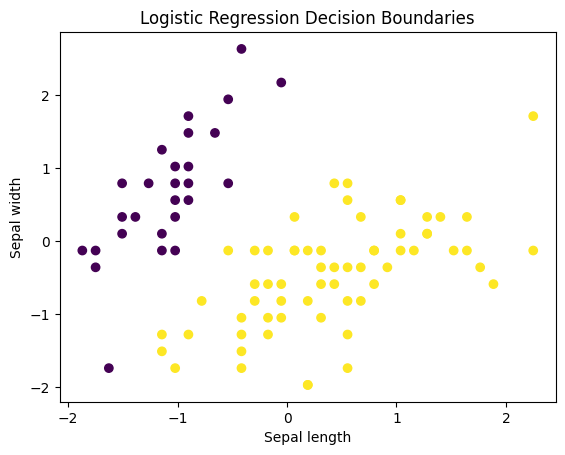

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_train[:,0],x_train[:,1], c=y_train)
plt.title('Logistic Regression Decision Boundaries')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# **Niaye Bayes**

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
x = iris.data
y = iris.target

x[:10]


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [ ]:
class NB():
  def fit(self,x,y):
    n_sample,n_features=x.shape
    self.classes=np.unique(y)
    n_classes=len(self.classes)

    self.means = np.zeros((n_classes,n_features))
    self.vars = np.zeros((n_classes,n_features))
    self.priors = np.zeros(n_classes)

    for i in range(n_classes):
      c=self.classes[i]
      x_c=x[y==c]
      self.means[i,:] = x_c.mean(axis=0)
      self.vars[i,:] = x_c.var(axis=0)
      self.priors[i]=x_c.shape[0]/x.shape[0]

  def predictone(self,x):
    posteriors=[]
    for i in range(len(self.classes)):
      c=self.classes[i]
      prior=np.log(self.priors[i])
      class_conditional = np.sum(np.log(self.pdf(x,i)))
      posterior = prior + class_conditional
      posteriors.append(posterior)

    return self.classes[np.argmax(posteriors)]

  def predict(self,X):
    return [self.predictone(x) for x in X]

  def pdf(self,x,i):
    mean=self.means[i]
    var = self.vars[i]
    num = np.exp(-(x-mean)**2/2*var)
    den = np.sqrt(2*np.pi*var)
    return num/den

In [ ]:
nb=NB()
nb.fit(x_train,y_train)
x_train.shape,y_train.shape

((120, 4), (120,))

In [ ]:
y_pred=nb.predict(x_test)
np.mean(y_pred==y_test)

0.3333333333333333

In [ ]:
y_pred

In [ ]:
y_test

# **KNN**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np

iris=datasets.load_iris()
x=iris.data
y=iris.target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from collections import Counter
class KNN():
  def __init__(self,k=3):
    self.k=3
  def fit(self,x,y):
    self.x_train=x
    self.y_train=y
  def predictone(self,x):
    distances=[]
    for x_t in x_train:
      distances.append(np.linalg.norm(x-x_t))
    k_indices = np.argsort(distances)[:self.k]
    k_nearest_labels=[self.y_train[i] for i in k_indices]
    most_common=Counter(k_nearest_labels).most_common(1)
    return most_common[0][0]
  def predict(self,x):
    return [self.predictone(xt) for xt in x]


In [ ]:
knn=KNN(k=3)
knn.fit(x_train,y_train)

In [ ]:
y_pred=knn.predict(x_test)
np.mean(y_pred==y_test)

1.0

<Axes: >

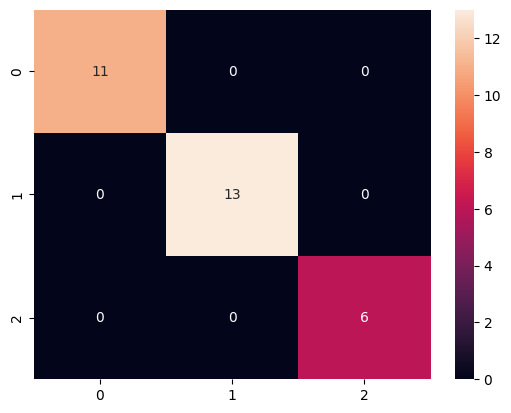

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

# K-Means

In [ ]:
import numpy as np

class Cluster:
  def __init__(self,centroid):
    self.centroid = centroid
    self.points = []
  def update_centroid(self):
    points=np.array(self.points)
    self.centroid = np.mean(points,axis=0)
  def get_distance(self,point):
    return np.linalg.norm(self.centroid-point,axis=0)
  def add_point(self,point):
    self.points.append(point)
  def clear_point(self):
    self.points.clear()

In [ ]:
class Kmeans:
  def __init__(self,k=3,max_itr=100):
    self.k=k
    self.max_itr=max_itr
  def find_cc(self,point):
    close_cluster=self.cluster[0]
    close_dist=self.cluster[0].get_distance(point)
    for c in self.cluster:
      dist = c.get_distance(point)
      if dist < close_dist:
        close_cluster = c
        close_dist=dist
    return close_cluster

  def fit(self,x):
    rand_ind = np.random.choice(x.shape[0],size=self.k,replace=False)
    rand_pts = [x[i] for i in rand_ind]
    self.cluster = [Cluster(point) for point in rand_pts]
    for i in range(self.max_itr):
      for point in x:
        cc = self.find_cc(point)
        cc.add_point(point)
      for ct in self.cluster:
        ct.update_centroid()
        ct.clear_point()

  def pred(self,point):
    return id(self.find_cc(point))

In [ ]:
from sklearn import datasets
x, y = datasets.make_blobs(n_samples=300, centers=3, cluster_std=1, random_state=42)

In [ ]:
km = Kmeans(3)
km.fit(x)

In [ ]:
y = []
for i in range(len(x)):
  y.append(km.pred(x[i]))

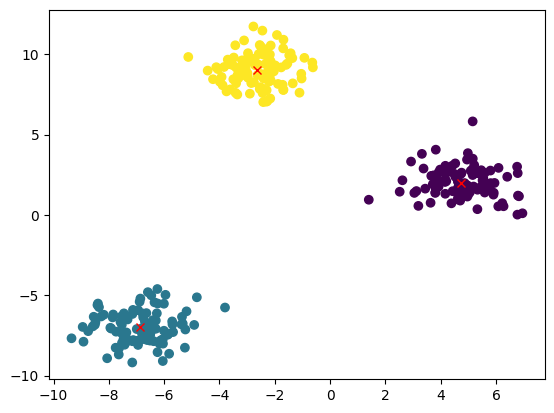

In [ ]:

import matplotlib.pyplot as plt

plt.scatter(x[:,0], x[:,1], c=y )
for cluster in km.cluster:
  plt.plot(cluster.centroid[0], cluster.centroid[1], marker='x', color="red")